In [1]:
import os
cwd = os.getcwd()

In [2]:
import sys
sys.path.insert(0, cwd + "/src/")

In [3]:
import dendrotweaks as dd
import numpy as np

/home/roman/Documents/code/DendroTweaks/app/src


ModuleNotFoundError: No module named 'dendrotweaks.membrane.io.preprocessor'

In [4]:
path_to_data = os.path.join(cwd, "data/")

PATHS = {
    "path_to_mod": os.path.join(path_to_data, "mod/"),
    "path_to_templates": os.path.join(path_to_data, "templates/"),
    "path_to_mechanisms": os.path.join(path_to_data, "mechanisms/"),
}

In [8]:
factory = dd.membrane.io.MechanismFactory()

AttributeError: module 'dendrotweaks.membrane' has no attribute 'io'

In [7]:
modm.convert_mod_to_python(file_name='Na', 
                           archive_name='Park_2019', 
                           template_name=template_name)

Reading file:
/home/roman/Documents/code/chanopy2/app/static/data/mod/Park_2019/Na.mod
Removed suffix from 'gbar' (e.g. gnabar -> gbar)
Removed 'UNITSOFF' and 'UNITSON'
Removed inline comments
Removed content between 'VERBATIM' and 'ENDVERBATIM'
Split content into blocks:
    1 - TITLE
    1 - COMMENT
    1 - NEURON
    1 - UNITS
    1 - PARAMETER
    1 - ASSIGNED
    1 - STATE
    1 - BREAKPOINT
    1 - DERIVATIVE
    1 - INITIAL
    1 - FUNCTION
    1 - PROCEDURE
    0 - KINETIC
No unmatched content.
Parsed TITLE block.
Parsed COMMENT block.
Parsed NEURON block.
Parsed UNITS block.
Parsed PARAMETER block.
Parsed ASSIGNED block.
Parsed STATE block.
Parsed BREAKPOINT block.
Parsed DERIVATIVE block.
Parsed INITIAL block.
Parsed FUNCTION block.


Replacing SUFFIX Na with SUFFIX Na
Overwritten /home/roman/Documents/code/chanopy2/app/static/data/mod/Park_2019/Na.mod


Parsed PROCEDURE block.


Restoring expressions in BREAKPOINT
Restoring expressions in DERIVATIVE
Restoring expressions in FUNCTION
Restoring expressions in PROCEDURE
Saved content to /home/roman/Documents/code/chanopy2/app/chanopy/collection/Na.py


# Test the channel

In [8]:
na = modm.create_mechanism('Na', 
                           'Park_2019', 
                           template_name=template_name)

Reading file:
/home/roman/Documents/code/chanopy2/app/static/data/mod/Park_2019/Na.mod
Removed suffix from 'gbar' (e.g. gnabar -> gbar)
Removed 'UNITSOFF' and 'UNITSON'
Removed inline comments
Removed content between 'VERBATIM' and 'ENDVERBATIM'
Split content into blocks:
    1 - TITLE
    1 - COMMENT
    1 - NEURON
    1 - UNITS
    1 - PARAMETER
    1 - ASSIGNED
    1 - STATE
    1 - BREAKPOINT
    1 - DERIVATIVE
    1 - INITIAL
    1 - FUNCTION
    1 - PROCEDURE
    0 - KINETIC
No unmatched content.
Parsed TITLE block.
Parsed COMMENT block.
Parsed NEURON block.
Parsed UNITS block.
Parsed PARAMETER block.
Parsed ASSIGNED block.
Parsed STATE block.
Parsed BREAKPOINT block.
Parsed DERIVATIVE block.
Parsed INITIAL block.
Parsed FUNCTION block.


Replacing SUFFIX Na with SUFFIX Na
Overwritten /home/roman/Documents/code/chanopy2/app/static/data/mod/Park_2019/Na.mod


Parsed PROCEDURE block.


Restoring expressions in BREAKPOINT
Restoring expressions in DERIVATIVE
Restoring expressions in FUNCTION
Restoring expressions in PROCEDURE
Saved content to /home/roman/Documents/code/chanopy2/app/chanopy/collection/Na.py


In [9]:
na.name

'Na'

In [10]:
na.states

{'m': 0.0, 'h': 0.0}

In [11]:
na.tadj

1

In [12]:
na.params

{'gbar': 0.0,
 'Rma': 0.182,
 'Rmb': 0.14,
 'v12m': -30,
 'qm': 9.8,
 'Rhb': 0.0091,
 'Rha': 0.024,
 'v12ha': -45,
 'v12hb': -70,
 'qh': 5,
 'v12hinf': -60,
 'qhinf': 6.2,
 'temp': 23,
 'q10': 2.3}

Got data for v in range -100.0 to 100.0 at 23°C


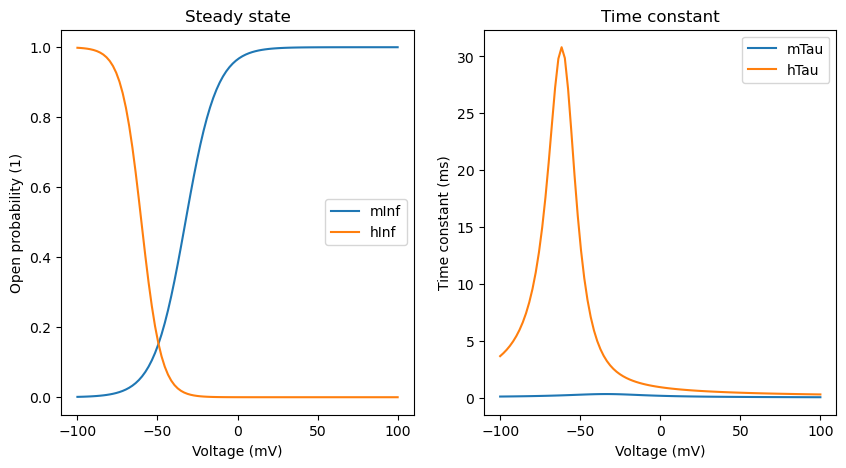

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
na.plot_kinetic_variables(ax, temperature=23)
# kv.plot_kinetic_variables(ax)

# Standardize channel

In [14]:
na.ion

'na'

In [15]:
from chanopy.mechanisms import StandardIonChannel
standard_channel = StandardIonChannel(name=na.name, 
                                      state_powers=na._state_powers,
                                      ion=na.ion)

In [16]:
data = na.get_data()

Got data for v in range -100.0 to 100.0 at 37°C


In [17]:
na.params['temp']

23

In [18]:
na_standard = modm.standardize_channel(na, 
                                       x=np.linspace(-100, 100, 1000),
                                       temperature=na.params['temp'])

Got data for v in range -100.0 to 100.0 at 23°C


In [19]:
na_standard.params

{'vhalf_m': -32.571,
 'sigma_m': 9.8,
 'k_m': 1.884,
 'delta_m': 0.541,
 'tau0_m': 0.065,
 'vhalf_h': -60.0,
 'sigma_h': -6.2,
 'k_h': 0.018,
 'delta_h': 0.397,
 'tau0_h': 0.795,
 'gbar': 0.0,
 'q10': 2.3,
 'temp': 23}

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 37°C


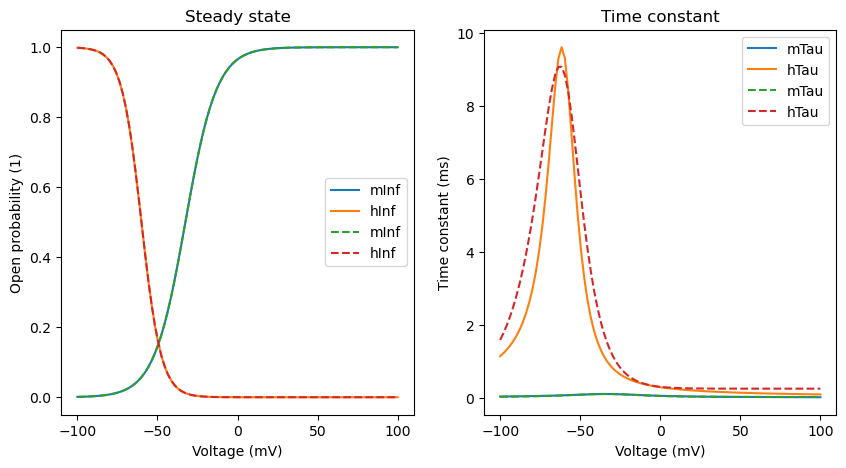

In [20]:
T = 37
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
na.plot_kinetic_variables(ax, temperature=T)
na_standard.plot_kinetic_variables(ax, linestyle='--', temperature=T)

In [21]:
modm.path_to_templates

'/home/roman/Documents/code/chanopy2/src/chanopy/templates'

In [22]:
modm.generate_and_write_nmodl(na_standard, 
                              template_name='standard')

Saved content to /home/roman/Documents/code/chanopy2/app/static/data/mod/sNa/sNa.mod


# Make sure channels are avaliable in NEURON

In [23]:
import neuron
from neuron import h

In [24]:
soma = neuron.h.Section(name='soma')

In [25]:
modm.list_archives()

Available archives in
/home/roman/Documents/code/chanopy2/app/static/data/mod/

├── Base/
│   ├── Na
│   └── Kv
├── Park_2019/
│   ├── Park_Ka
│   ├── Park_Km
│   ├── Na
│   ├── Kv
│   ├── Park_Ca_LVA
│   ├── Park_Ca_HVA
│   └── Park_KCa
└── sNa/
    └── sNa


In [26]:
modm.loader._loaded_archives

['test']

In [27]:
modm.load_archive('Base')

/home/roman/Documents/code/chanopy2/app/static/data/mod/Base
Mod files: "./Kv.mod" "./Na.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../Kv.mod
 -> NMODL ../Na.mod
 -> Compiling Kv.c
 -> Compiling Na.c


/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Kv.mod into /home/roman/Documents/code/chanopy2/app/static/data/mod/Base/x86_64/Kv.c
Translating Na.mod into /home/roman/Documents/code/chanopy2/app/static/data/mod/Base/x86_64/Na.c
Thread Safe
Thread Safe


 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/home/roman/Documents/code/chanopy2/app/static/data/mod/Base"
Loaded mechanisms from "/home/roman/Documents/code/chanopy2/app/static/data/mod/Base"


In [28]:
soma.insert('Na')

soma

In [29]:
modm.load_archive('sNa')

/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating sNa.mod into /home/roman/Documents/code/chanopy2/app/static/data/mod/sNa/x86_64/sNa.c
Thread Safe


/home/roman/Documents/code/chanopy2/app/static/data/mod/sNa
Mod files: "./sNa.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../sNa.mod
 -> Compiling sNa.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/home/roman/Documents/code/chanopy2/app/static/data/mod/sNa"
Loaded mechanisms from "/home/roman/Documents/code/chanopy2/app/static/data/mod/sNa"


In [30]:
soma.insert('sNa')

soma